In [45]:
%matplotlib inline

from neo import io
import quantities as qn
import matplotlib.pyplot as plt
import numpy as np

In [10]:
nombre="../DatosIntraCelularesFelipe/C1_21_2_17/PP1_L06hz_C1_21_2_17.abf"

In [11]:
archivo=io.AxonIO(filename=nombre)

In [8]:
datos=archivo.read_block(lazy=False, cascade=True)

In [12]:
canalma=datos.segments[0].analogsignals[0]

In [36]:
for i in canalma:
    if(i>100):
        print(i)

[ 159.62388611] pA
[ 148.94273376] pA


Python cuenta desde 0. np.where te da la lista de índices donde se cumple una condicion. Los objetos tipo analogsignal son complejos, así que nos da una doble lísta. De la primera parte de la lista están los índices **TEMPORALES** de los evento que cumplen la condición descrita en where. De ahí tomamos el primero de todos, es decir... el cero. 

In [62]:
np.where(canalma>100)[0][0]

571

In [90]:
np.where(canalma>100)

(array([], dtype=int64),)

In [47]:
z=canalma[100]

In [48]:
z

array([ 5.51011848], dtype=float32) * pA

In [44]:
canalma[0]

array([-6.0865612], dtype=float32) * pA

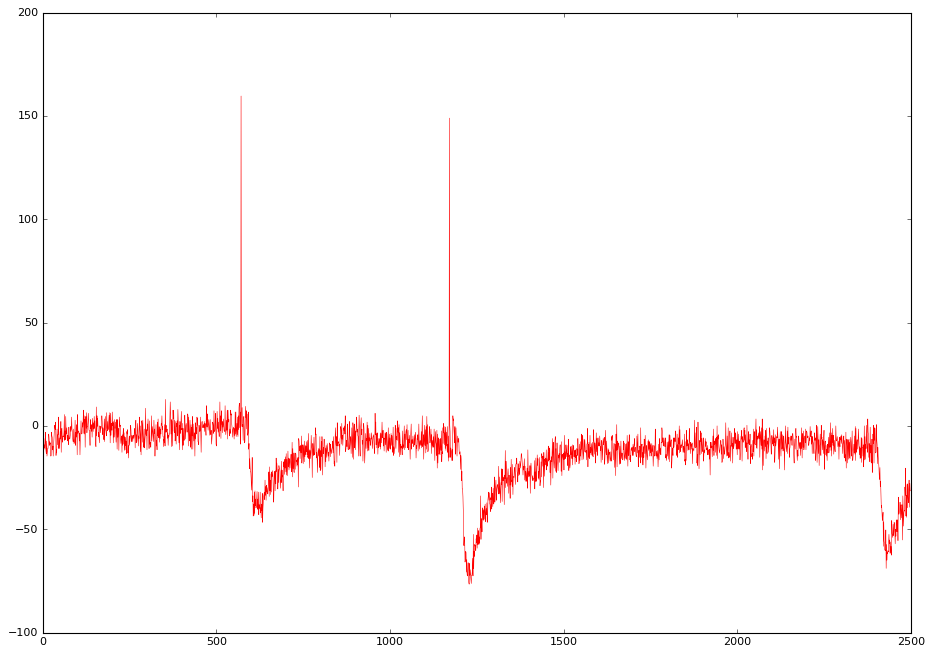

In [20]:
plt.figure(figsize=(14,10))
plt.plot(canalma, c="red", lw="0.5")
plt.show()

In [82]:
def detectaestimulo(datos, umbral=100):
    "Funcion que da el primer estimulo que pasa de un umbral de un analogsignal"
    primer=np.where(canalma>umbral)[0][0]
    primer=int(primer)
    return primer

In [83]:
def recortasegnal(datos, indice, desde=50, hasta=500):
    "Funcion que nos recorta una señal a partir de un indice"
    result=datos[indice-desde:indice+hasta]
    return result

In [84]:
uno=detectaestimulo(canalma)

In [85]:
cacho=recortasegnal(canalma,uno)

In [86]:
cacho

AnalogSignal with 1 channels of length 550; units pA; datatype float32 
name: 'Im_scaled'
annotations: {'channel_index': 0}
sampling rate: 10000.0 Hz
time: 0.0521 s to 0.1071 s

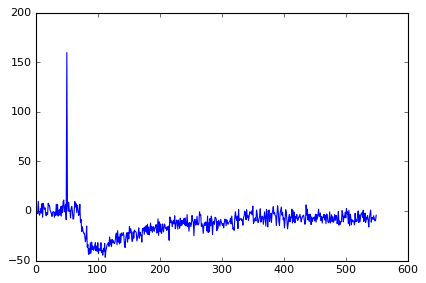

In [87]:
plt.plot(cacho)

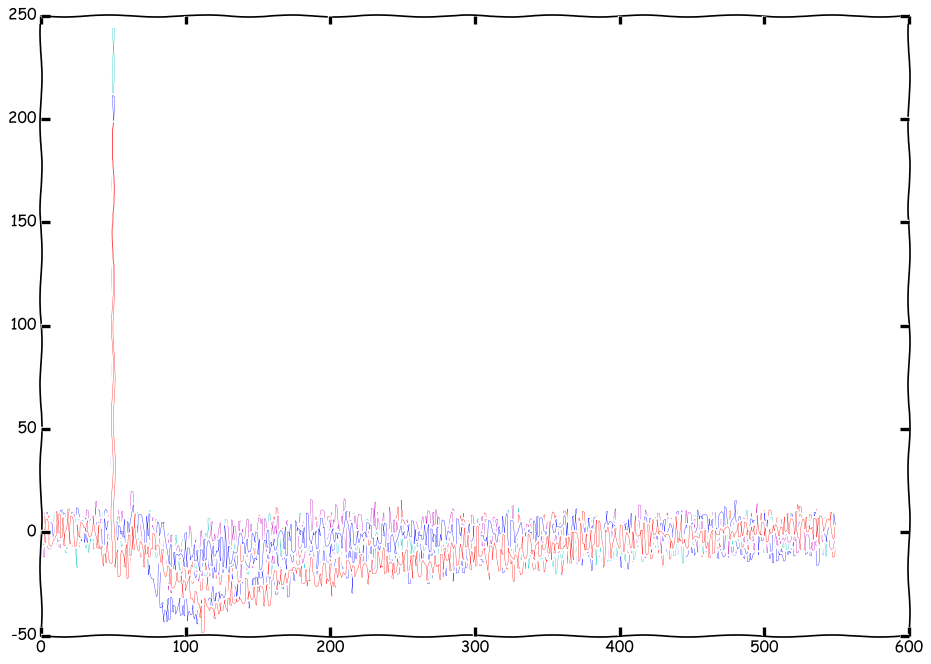

In [93]:
dibujo=plt.figure(figsize=(14,10))
with plt.xkcd():
    for j in datos.segments:
        estimindex=detectaestimulo(j.analogsignals[0])
        cacho=recortasegnal(j.analogsignals[0],estimindex)
        plt.plot(cacho,lw=0.3)
    plt.show()